In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
url = "uber.csv"
df = pd.read_csv(url)

In [6]:
print(df.head())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

1. Data Preprocessing

In [7]:
print(df.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [8]:
df.dropna(inplace=True)

In [9]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [10]:
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

In [11]:
df = df[['passenger_count', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'hour', 'fare_amount']]

2. Identify Outliers

In [12]:
z_scores = np.abs(stats.zscore(df['fare_amount']))
df.loc[:, 'outlier'] = z_scores > 3 
outliers = df[df['outlier']]
print("Number of outliers detected:", len(outliers))

Number of outliers detected: 5450


3. Check Correlation

In [13]:
correlation_matrix = df.corr()
print(correlation_matrix)

                   passenger_count  pickup_longitude  pickup_latitude  \
passenger_count           1.000000         -0.000415        -0.001559   
pickup_longitude         -0.000415          1.000000        -0.816461   
pickup_latitude          -0.001559         -0.816461         1.000000   
dropoff_longitude         0.000033          0.833026        -0.774787   
dropoff_latitude         -0.000659         -0.846324         0.702367   
hour                      0.013187          0.002432        -0.003821   
fare_amount               0.010158          0.010458        -0.008482   
outlier                   0.007428          0.010539        -0.009197   

                   dropoff_longitude  dropoff_latitude      hour  fare_amount  \
passenger_count             0.000033         -0.000659  0.013187     0.010158   
pickup_longitude            0.833026         -0.846324  0.002432     0.010458   
pickup_latitude            -0.774787          0.702367 -0.003821    -0.008482   
dropoff_longitude 

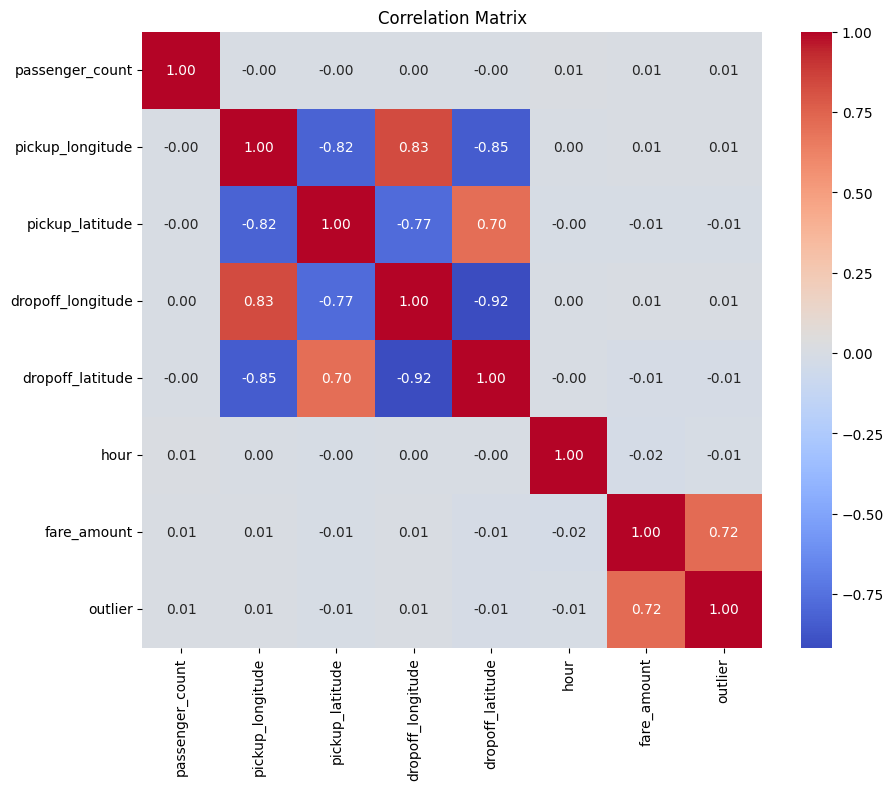

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

4. Implement Random Forest Regression

In [2]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

NameError: name 'LinearRegression' is not defined

5. Evaluate Models

In [46]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

6. Evaluate Models

In [47]:
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

In [48]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [50]:
print(f'Linear Regression: R² = {r2_linear:.4f}, RMSE = {rmse_linear:.4f}')
print(f'Random Forest Regression: R² = {r2_rf:.4f}, RMSE = {rmse_rf:.4f}')

Linear Regression: R² = 0.0009, RMSE = 10.1949
Random Forest Regression: R² = 0.7031, RMSE = 5.5571
